# Tools to compare outputs among models
Last modification: 2023.11.08.</br>
Update note: Added comparing transition

# Initiate

In [1]:
import numpy as np
import setup_shortcut
import change_params
from read_outputs import *
sc = setup_shortcut.setups()
ch = change_params.variate()

target_eventid = 8
save_dir = 'perturb_stress/seissol_outputs'
# model_n = 'vert_fast'
model_n = 'vert_slow_X30'
# model_n = 'vert_slow'
# model_n = 'dipping_fast'
# model_n = 'dipping_slow'
mu = 0.4
# receivef_strike = 330
receivef_strike = 340
# receivef_strike = 350

save_dir1 = '/export/dump/jyun/'+'perturb_stress/reference'
# save_dir2 = '/export/dump/jyun/'+'perturb_stress/reference_1'
# save_dir3 = '/export/dump/jyun/'+'perturb_stress/reference_2'
# save_dir4 = '/export/dump/jyun/'+'perturb_stress/reference_3'
# save_dir2 = '/export/dump/jyun/'+'BP1/del_debug_pert'
# save_dir3 = '/export/dump/jyun/'+'BP1/del_debug_after_pert'
# save_dir2 = '/export/dump/jyun/'+'perturb_stress/match%d'%(target_eventid)
# save_dir2 = '/export/dump/jyun/'+'perturb_stress/adj_pert%d_%s%d'%(target_eventid,sc.model_code(model_n),receivef_strike)
save_dir2 = '/export/dump/jyun/'+'perturb_stress/pert%d_%s%d'%(target_eventid,sc.model_code(model_n),receivef_strike)
# save_dir3 = '/export/dump/jyun/'+'perturb_stress/after_pert%d_%s%d'%(target_eventid,sc.model_code(model_n),receivef_strike)
# save_dir3 = '/export/dump/jyun/'+'perturb_stress/before_fix/after_pert%d_%s%d'%(target_eventid,sc.model_code(model_n),receivef_strike)
# save_dir3 = '/export/dump/jyun/'+'perturb_stress/adj3_pert%d_%s%d'%(target_eventid,sc.model_code(model_n),receivef_strike)
# save_dir3 = '/export/dump/jyun/'+'perturb_stress/continue_pert%d_%s%d'%(target_eventid,sc.model_code(model_n),receivef_strike)
# save_dir4 = '/export/dump/jyun/'+'perturb_stress/after_pert%d_%s%d'%(target_eventid,sc.model_code(model_n),receivef_strike)

# outputs1,dep1,params1 = load_short_fault_probe_outputs(save_dir1,0)
if 'save_dir2' in locals(): outputs2,dep2,params2 = load_fault_probe_outputs(save_dir2)
if 'save_dir3' in locals(): outputs3,dep3,params3 = load_fault_probe_outputs(save_dir3)
if 'save_dir4' in locals(): outputs4,dep4,params4 = load_fault_probe_outputs(save_dir4)

if 'save_dir1' in locals():
    start_time = np.load('%s/short_outputs_start_time.npy'%(save_dir1))
    if 'outputs3' in locals():
        soidx = np.where(start_time<=np.min([outputs2[0,0,0],outputs3[0,0,0]]))[0][-1]
        if soidx < len(start_time)-1 and outputs3[0,-1,0] >= start_time[soidx+1]:
            print('WARNING: Output 2 and 3 are in the middle of short outputs %d and %d - loading both'%(soidx,soidx+1))
            outputs1_1,dep1_1,params1_1 = load_short_fault_probe_outputs(save_dir1,soidx)
            outputs1_2,dep1_2,params1_2 = load_short_fault_probe_outputs(save_dir1,soidx+1)
        else:
            outputs1,dep1,params1 = load_short_fault_probe_outputs(save_dir1,soidx)
    else:
        soidx = np.where(start_time<=np.min(outputs2[0,0,0]))[0][-1]
        outputs1,dep1,params1 = load_short_fault_probe_outputs(save_dir1,soidx)
    # outputs1,dep1,params1 = load_short_fault_probe_outputs(save_dir1,0)

if os.path.exists(save_dir2+'/checkpoint_info.csv'):
    print('Load checkpoint info from ',save_dir2+'/checkpoint_info.csv')
    ckp_dat2 = load_checkpoint_info(save_dir2)
# ckp_dat2 = load_checkpoint_info(save_dir2)
# ckp_dat3 = load_checkpoint_info(save_dir3)
# ckp_dat4 = load_checkpoint_info(save_dir4)

Load saved data: /export/dump/jyun/perturb_stress/pert8_vsX30_340/outputs.npy
Load saved data: /export/dump/jyun/perturb_stress/pert8_vsX30_340/outputs_depthinfo.npy
Load saved data: /export/dump/jyun/perturb_stress/pert8_vsX30_340/const_params.npy
Load saved data: /export/dump/jyun/perturb_stress/reference/short_outputs_0
Load saved data: /export/dump/jyun/perturb_stress/reference/outputs_depthinfo
Load saved data: /export/dump/jyun/perturb_stress/reference/const_params.npy
Load checkpoint info from  /export/dump/jyun/perturb_stress/pert8_vsX30_340/checkpoint_info.csv


In [2]:
from cumslip_compute import analyze_events
cumslip_dir = '/export/dump/jyun/'+'perturb_stress/reference'
if 'v6_ab2_Dc2' in cumslip_dir:
    Vths = 1e-1
    intv = 0.15
elif 'perturb_stress' in cumslip_dir:
    Vths = 2e-1
    intv = 0.15
else:
    Vths = 1e-2
    intv = 0.
Vlb = 0
dt_interm = 0
cuttime = 0
rths = 10
dt_creep = 2*ch.yr2sec
dt_coseismic = 0.5

if os.path.exists('%s/cumslip_outputs_Vths_%1.0e_srvar_%03d_rths_%d_tcreep_%d_tseis_%02d.npy'%(cumslip_dir,Vths,intv*100,rths,dt_creep/ch.yr2sec,dt_coseismic*10)):
    cumslip_outputs = np.load('%s/cumslip_outputs_Vths_%1.0e_srvar_%03d_rths_%d_tcreep_%d_tseis_%02d.npy'%(cumslip_dir,Vths,intv*100,rths,dt_creep/ch.yr2sec,dt_coseismic*10),allow_pickle=True)
    spin_up_idx = np.load('%s/spin_up_idx_Vths_%1.0e_srvar_%03d_rths_%d_tcreep_%d_tseis_%02d.npy'%(cumslip_dir,Vths,intv*100,rths,dt_creep/ch.yr2sec,dt_coseismic*10))
    tstart,tend,evdep = cumslip_outputs[0][0],cumslip_outputs[0][1],cumslip_outputs[1][1]
    # system_wide = analyze_events(cumslip_outputs,rths)[2]
    rupture_length,av_slip,system_wide,partial_rupture,event_cluster,lead_fs,major_pr,minor_pr = analyze_events(cumslip_outputs,rths)
    idx = system_wide[system_wide>=spin_up_idx][target_eventid]
    print('Loaded pre-saved cumslip outputs')
else:
    print('No pre-saved cumslip outputs')

Loaded pre-saved cumslip outputs


In [5]:
from cumslip_compute import compute_cumslip
if 'save_dir3' in locals(): outputs3,dep3,params3 = load_fault_probe_outputs(save_dir3)
cumslip_outputs3 = compute_cumslip(outputs3,dep3,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm,intv)
tstart3,tend3,evdep3 = cumslip_outputs3[0][0],cumslip_outputs3[0][1],cumslip_outputs3[1][1]
system_wide3 = analyze_events(cumslip_outputs3,rths)[2]
print('system_wide3',system_wide3)
print('Event depth after perturbation:',evdep3[system_wide3])

Load saved data: /export/dump/jyun/perturb_stress/after_pert20_vs340/outputs.npy


Load saved data: /export/dump/jyun/perturb_stress/after_pert20_vs340/outputs_depthinfo.npy
Load saved data: /export/dump/jyun/perturb_stress/after_pert20_vs340/const_params.npy
Cumulative slip vs. Depth plot >>> No cutting
Slip rate > 2e-01
All safe from the SR variation criterion
Remove single-depth activated event: []
Event depth after perturbation: [ 9.78 12.58  6.54 10.84  4.28 11.38]
system_wide3 [4]


In [12]:
from cumslip_compute import compute_cumslip
if 'save_dir2' in locals(): outputs2,dep2,params2 = load_fault_probe_outputs(save_dir2)
cumslip_outputs2 = compute_cumslip(outputs2,dep2,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm,intv)
tstart2,tend2,evdep2 = cumslip_outputs2[0][0],cumslip_outputs2[0][1],cumslip_outputs2[1][1]
system_wide2 = analyze_events(cumslip_outputs2,rths)[2]
print('system_wide2',system_wide2)
print('Event depth after perturbation:',evdep2[system_wide2])

Load saved data: /export/dump/jyun/perturb_stress/pert8_vsX30_340/outputs.npy
Load saved data: /export/dump/jyun/perturb_stress/pert8_vsX30_340/outputs_depthinfo.npy
Load saved data: /export/dump/jyun/perturb_stress/pert8_vsX30_340/const_params.npy
Cumulative slip vs. Depth plot >>> No cutting
Slip rate > 2e-01
All safe from the SR variation criterion
Remove single-depth activated event: []
system_wide2 [0 1 2]
Event depth after perturbation: [8.46 7.9  7.86]


In [20]:
tstart[idx]-3600*5

27120985941.39096

In [ ]:
try:
    print(outputs1[0,0,0],'to',outputs1[0,-1,0])
except:
    print(outputs1_1[0,0,0],'to',outputs1_2[0,-1,0])
print(np.sort(ckp_dat2,axis=0)[-1][-1])
# print(outputs3[0,0,0])
# print(np.sort(ckp_dat4,axis=0)[-1][-1])
# print(outputs5[0,0,0])

# Define plotting tools

In [3]:
import matplotlib.pylab as plt
from scipy import signal,interpolate
import myplots
mp = myplots.Figpref()
plt.rcParams['font.size'] = '15'

def along_fault_at_transition(save_dir,outputs,dep,target_var,ls='-',col='k',lab='',print_on=True,save_on=True):
    if print_on:
        print('At time %1.4f s'%(outputs[0,0]))
    if target_var == 'state':
        var = np.array(outputs[:,1])
        ylab = 'State Variable'
        fign = 'state'
    elif target_var == 'slip':
        var = np.array(outputs[:,2])
        ylab = 'Cumulative Slip [m]'
        fign = 'cumslip'
    elif target_var == 'shearT':
        var = abs(np.array(outputs[:,3]))
        ylab = 'Absolute Shear Stress [MPa]'
        fign = 'shearT'
    elif target_var == 'sliprate':
        if np.all(np.array(outputs[:,4])>0):
            var = np.log10(np.array(outputs[:,4]))
        else:
            print('Negative slip rate - taking absolute')
            var = np.log10(abs(np.array(outputs[:,4])))
        ylab = 'log$_{10}$(Slip Rate [m/s])'
        fign = 'sliprate'
    elif target_var == 'normalT':
        var = abs(np.array(outputs[:,5]))
        ylab = 'Absolute Normal Stress [MPa]'
        fign = 'normalT'

    plt.plot(var,-dep,color=col, lw=2.5,label=lab,linestyle=ls)
    plt.xlabel(ylab,fontsize=17)
    plt.ylabel('Depth [km]',fontsize=17)
    plt.ylim(min(abs(dep)),max(abs(dep)))    
    plt.tight_layout()
    if save_on:
        plt.savefig('%s/%s_at_transition.png'%(save_dir,fign))

def get_var(outputs,dep,target_depth,target_var,plot_in_sec,abs_on):
    if target_depth == None:
        print('Mode: Maximum along fault')
        indx = None
    else:
        indx = np.argmin(abs(abs(dep) - abs(target_depth)))
        print('Depth = %1.1f [km]'%abs(dep[indx]))

    if target_var == 'state':
        var_idx,ylab,fign = 1,'State Variable','state'
    elif target_var == 'slip':
        var_idx,ylab,fign = 2,'Cumulative Slip [m]','cumslip'
    elif target_var == 'shearT':
        var_idx,ylab,fign = 3,'Shear Stress [MPa]','shearT'
    elif target_var == 'sliprate':
        var_idx,ylab,fign = 4,'log$_{10}$(Slip Rate [m/s])','sliprate'
    elif target_var == 'normalT':
        var_idx,ylab,fign = 5,'Normal Stress [MPa]','normalT'

    if target_depth == None:
        if var_idx == 4:
            var = np.log10(np.max(np.array(outputs[:,:,var_idx]),axis=0))
            # var = np.max(np.log10(np.array(outputs[:,:,var_idx])),axis=0)
        else:
            var = np.max(np.array(outputs[:,:,var_idx]),axis=0)
        ylab = 'Peak ' + ylab
    else:
        if var_idx == 4:
            if np.all(np.array(outputs[indx])[:,var_idx]>0):
                var = np.log10(np.array(outputs[indx])[:,var_idx])
            else:
                print('Negative slip rate - taking absolute')
                var = np.log10(abs(np.array(outputs[indx])[:,var_idx]))
        else:
            var = np.array(outputs[indx])[:,var_idx]
    if abs_on:
        var = abs(var)
        ylab = 'Absolute ' + ylab
    if plot_in_sec:
        time = np.array(outputs[0])[:,0]
        xlab = 'Time [s]'
    else:
        time = np.array(outputs[0])[:,0]/sc.yr2sec
        xlab = 'Time [yrs]'
    return time,var,xlab,ylab,fign,indx

def get_lag(base_t,var_ref,t_ref,var_pert,t_pert,print_on=False):
    dat_ref = interpolate.interp1d(t_ref,var_ref)(base_t) # reference model 
    if base_t.max()>t_pert.max() or base_t.min()<t_pert.max():
        dat_pert = interpolate.interp1d(t_pert,var_pert)(base_t[np.logical_and(base_t<=t_pert.max(),base_t>=t_pert.min())])
    else:
        dat_pert = interpolate.interp1d(t_pert,var_pert)(base_t)
    dat_ref -= np.mean(dat_ref)
    dat_pert -= np.mean(dat_pert)
    corr = signal.correlate(dat_ref,dat_pert)
    lags = signal.correlation_lags(len(dat_ref),len(dat_pert))
    dat_corr = corr/max(abs(corr))
    dt = np.diff(base_t)[0]
    lag = lags[np.argmax(dat_corr)]*dt
    if print_on:
        if lag > 0:
            print('Time advance of %1.4f s'%lag)
        elif lag == 0:
            print('No change in event time')
        else:
            print('Time delay of %1.4f s'%lag)
    return lag

def fout_time(save_dir,outputs,dep,target_depth,target_var,plot_in_sec,ls='-',col='k',lab='',abs_on=False,save_on=True):
    time,var,xlab,ylab,fign,indx = get_var(outputs,dep,target_depth,target_var,plot_in_sec,abs_on)
    plt.plot(time,var,color=col, lw=2.5,label=lab,linestyle=ls)
    plt.xlabel(xlab,fontsize=17)
    plt.ylabel(ylab,fontsize=17)
    if target_depth < 1e-1:
        plt.title('Depth = surface',fontsize=20,fontweight = 'bold')
    else:
        plt.title('Depth = %1.1f [km]'%abs(dep[indx]),fontsize=20,fontweight = 'bold')
    plt.tight_layout()
    if save_on:
        plt.savefig('%s/%s.png'%(save_dir,fign))

def fout_time_max(save_dir,outputs,target_var,plot_in_sec,toff=0,ls='-',col='k',lab='',abs_on=False,save_on=True):
    time,var,xlab,ylab,fign,_ = get_var(outputs,None,None,target_var,plot_in_sec,abs_on)
    if abs(toff) > 0: time += toff
    plt.plot(time,var,color=col, lw=2.5,label=lab,linestyle=ls)
    plt.xlabel(xlab,fontsize=17)
    plt.ylabel(ylab,fontsize=17)
    plt.tight_layout()
    if save_on:
        plt.savefig('%s/%s.png'%(save_dir,fign))

def fout_time_max_diff(save_dir,outputs,outputs2,target_var,plot_in_sec,ls='-',col='k',lab='',abs_on=False,save_on=True):
    time1,var1,xlab,ylab,fign,_ = get_var(outputs,None,None,target_var,plot_in_sec,abs_on)
    time2,var2,_,_,_,_ = get_var(outputs2,None,None,target_var,plot_in_sec,abs_on)
    plt.plot(time,var2-var1,color=col, lw=2,label=lab,linestyle=ls)
    plt.xlabel(xlab,fontsize=17)
    plt.ylabel(ylab,fontsize=17)
    plt.tight_layout()
    if save_on:
        plt.savefig('%s/%s.png'%(save_dir,fign))

def stress_pert_at_depth(save_dir,ref_outputs,dep,delVar,depth_range,target_depth,target_var,plot_in_sec,dt=0.01,ls='-',col='k',lab='',abs_on=False,print_on=True,save_on=True):
    indx = np.argmin(abs(abs(dep) - abs(target_depth)))
    print('Depth = %1.1f [km]'%abs(dep[indx]))
    t0 = ref_outputs[0,0,0]
    time = np.linspace(t0,t0+delVar.shape[0]*dt,delVar.shape[0])
    di = np.argmin(abs(depth_range+target_depth))
    if target_var == 'shearT':
        if abs_on:
            var = abs(np.array(ref_outputs[indx])[:,3])
            ylab = 'Absolute Shear Stress [MPa]'
        else:
            var = np.array(ref_outputs[indx])[:,3]
            ylab = 'Shear Stress [MPa]'
        fign = 'shearT'
    elif target_var == 'normalT':
        if abs_on:
            var = abs(np.array(ref_outputs[indx])[:,5])
            ylab = 'Absolute Normal Stress [MPa]'
        else:
            var = np.array(ref_outputs[indx])[:,5]
            ylab = 'Normal Stress [MPa]'
        fign = 'normalT'
    if plot_in_sec:        # --- Plot in seconds
        plt.plot(time,delVar[:,di]+var[0],color=col,lw=2.5,label=lab,linestyle=ls)
        # plt.plot(time,delVar[:,di]+var[1],color=col,lw=2.5,label=lab,linestyle=ls)
        plt.xlabel('Time [s]',fontsize=17)
        otime = time
    else:        # --- Plot in years
        plt.plot(time/sc.yr2sec,delVar[:,di]+var[0],color=col, lw=2.5,label=lab,linestyle=ls)
        # plt.plot(time/sc.yr2sec,delVar[:,di]+var[1],color=col, lw=2.5,label=lab,linestyle=ls)
        plt.xlabel('Time [yrs]',fontsize=17)
        otime = time/sc.yr2sec
    plt.ylabel(ylab,fontsize=17)
    plt.tight_layout()
    if save_on:
        plt.savefig('%s/%s.png'%(save_dir,fign))
    return otime,delVar[:,di]+var[1]

def dCFS_at_depth(save_dir,outputs,dep,dCFSt_seissol,depth_range,target_depth,mu,dt=0.01,ls1='-',ls2='-',col1='k',col2=mp.myburgundy,lab1='',lab2='',save_on=True):
    from scipy import interpolate
    indx = np.argmin(abs(abs(dep) - abs(target_depth)))
    print('Depth = %1.2f [km]'%abs(dep[indx]))
    pn = np.array(outputs[indx])[:,5]-np.array(outputs[indx])[0,5]
    ts = np.array(outputs[indx])[:,3]-np.array(outputs[indx])[0,3]
    dCFSt_in = [interpolate.interp1d(depth_range,dCFSt_seissol[ti])(-target_depth) for ti in range(dCFSt_seissol.shape[0])]
    dCFSt_out = -ts - mu*pn
    # dCFSt_out = -ts + mu*pn
    time_in = np.linspace(0,dCFSt_seissol.shape[0]*dt,dCFSt_seissol.shape[0])
    time_out = np.array(outputs[indx])[:,0]-np.array(outputs[indx])[0,0]
    plt.plot(time_in,dCFSt_in,color=col1,lw=2,label='Input Perturbation'+lab1,linestyle=ls1)
    plt.plot(time_out,dCFSt_out,color=col2,lw=2,label='Output Perturbation'+lab2,linestyle=ls2)
    plt.xlabel('Time [s]',fontsize=17)
    plt.ylabel('dCFS [Mpa]',fontsize=17)
    plt.grid(True,alpha=0.5)
    plt.tight_layout()
    if save_on:
        plt.savefig('%s/dCFS_model.png'%(save_dir))

# Estimate perturbation response

Mode: Maximum along fault


Mode: Maximum along fault
Mode: Maximum along fault
Not shifted
Mode: Maximum along fault


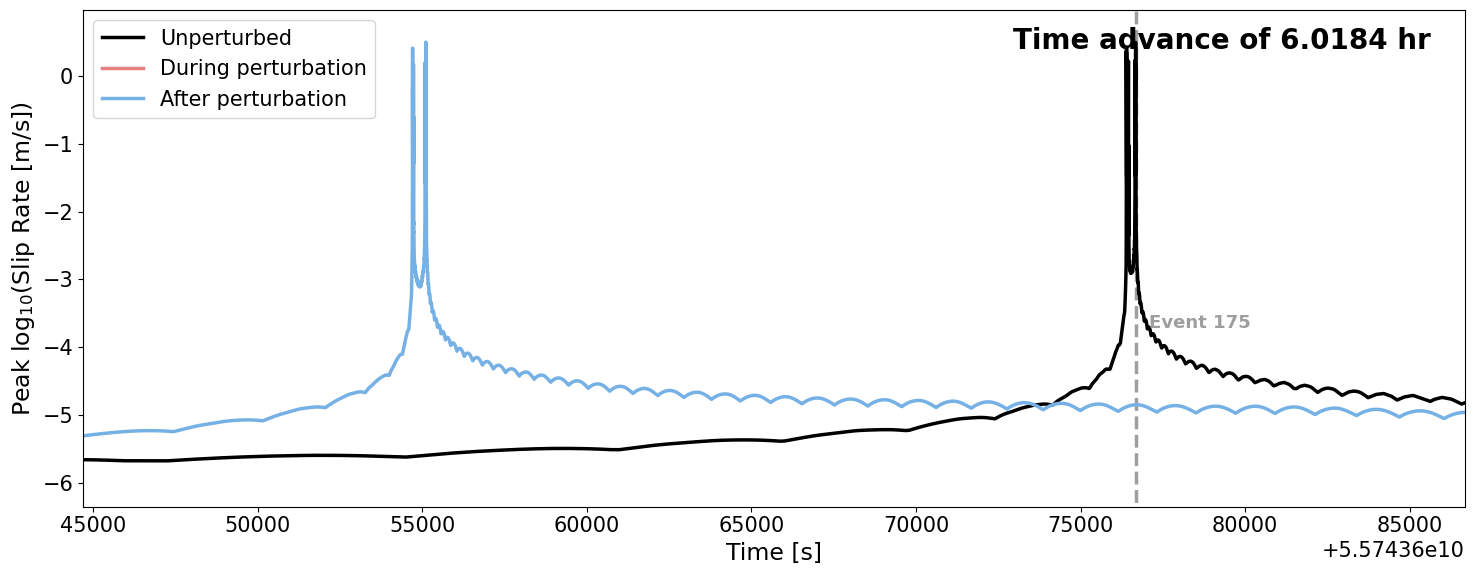

In [50]:
plt.figure(figsize=(15,6))
# cut_init = False
cut_init = True
shift_figure = False
# shift_figure = True
tvar = 'sliprate'
inc1 = 1e3
inc2 = 5e4
if 'save_dir3' not in locals(): 
    i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc,outputs1[0,:,0]<=outputs2[0,-1,0]+inc))[0]
else:
    i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc1,outputs1[0,:,0]<=outputs3[0,-1,0]+inc2))[0]
fout_time_max(save_dir1,outputs1[:,i1,:],tvar,lab='Unperturbed',plot_in_sec=True,col='k',save_on=False)
maxvar1 = get_var(outputs1[:,i1,:],None,None,tvar,plot_in_sec=True,abs_on=False)[1]
if cut_init:
    # fout_time_max(save_dir2,outputs2,tvar,lab='During perturbation',plot_in_sec=True,col=mp.mypink,save_on=False)
    fout_time_max(save_dir2,outputs2[:,1:,:],tvar,lab='During perturbation',plot_in_sec=True,col=mp.mypink,save_on=False)
    # maxvar3 = get_var(outputs3[:,1:,:],None,None,tvar,plot_in_sec=True,abs_on=False)[1]
    # # base_t = np.linspace(np.min([outputs3[0,int(outputs3.shape[1]*0.05),0],tstart[idx]-100])\
    #                     #  ,np.max([outputs3[0,-1,0],tend[idx]+80])\
    # base_t = np.linspace(outputs3[0,int(outputs3.shape[1]*0.02),0]\
    #                      ,tend[idx]+5000\
    #                         ,10000)-outputs3[0,1,0]
    # lag = get_lag(base_t,maxvar1,outputs1[0,i1,0]-outputs3[0,1,0],maxvar3,outputs3[0,1:,0]-outputs3[0,1,0],print_on=True)
    lag = 3600*6.0184
    time_tag = "advance" if lag > 0 else "delay"
    if not shift_figure:
        print('Not shifted')
        fout_time_max(save_dir3,outputs3[:,1:,:],tvar,lab='After perturbation',plot_in_sec=True,col=mp.myblue,save_on=False)
    else:
        fout_time_max(save_dir3,outputs3[:,1:,:],tvar,toff=lag,lab='After perturbation',plot_in_sec=True,col=mp.myblue,save_on=False)
    # plt.xlim(np.min([outputs3[0,int(outputs3.shape[1]*0.05),0],tstart[idx]-100]),np.max([outputs3[0,-1,0],tend[idx]+100]))
    plt.xlim(np.min([outputs3[0,int(outputs3.shape[1]*0.05),0],tstart[idx]-100])-10000,tend[idx]+10000)
    yl = plt.gca().get_ylim()
    plt.vlines(x=tstart[idx],ymin=yl[0],ymax=yl[1],lw=2.5,colors='0.62',linestyles='--',zorder=0)
    xl = plt.gca().get_xlim()
    plt.text(tstart[idx]+(xl[1]-xl[0])*0.01,-yl[1]*3.8,'Event %d'%(idx),fontsize=13,color='0.62',fontweight='bold')
    if lag < 3600:
        plt.text(xl[1]-(xl[1]-xl[0])*0.025,yl[1]*0.75,'Time %s of %1.4f s'%(time_tag,lag),fontsize=20,color='k',fontweight='bold',ha='right',va='top')
    else:
        plt.text(xl[1]-(xl[1]-xl[0])*0.025,yl[1]*0.75,'Time %s of %1.4f hr'%(time_tag,lag/3600),fontsize=20,color='k',fontweight='bold',ha='right',va='top')
    # plt.ylim(-yl[1]*3.8,yl[1])
    plt.ylim(-yl[1]*6.5,yl[1])
else:
    fout_time_max(save_dir2,outputs2,tvar,lab='During perturbation',plot_in_sec=True,col=mp.mypink,save_on=False)
    fout_time_max(save_dir3,outputs3,tvar,lab='After perturbation',plot_in_sec=True,col=mp.myblue,save_on=False)
plt.legend(fontsize=15,loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
inc = 1e3
# i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc,outputs1[0,:,0]<=tend[idx]+100))[0]
i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc,outputs1[0,:,0]<=outputs2[0,-1,0]+inc))[0]
fout_time_max(save_dir1,outputs1[:,i1,:],tvar,lab='Unperturbed',plot_in_sec=True,col='k',save_on=False)
fout_time_max(save_dir2,outputs2,tvar,lab='During perturbation',plot_in_sec=True,col=mp.mypink,save_on=False)
plt.xlim(outputs2[0,0,0]-10,outputs2[0,-1,0]+10)
plt.legend(fontsize=15,loc='upper left')
plt.show()

Mode: Maximum along fault
Not shifted
Mode: Maximum along fault


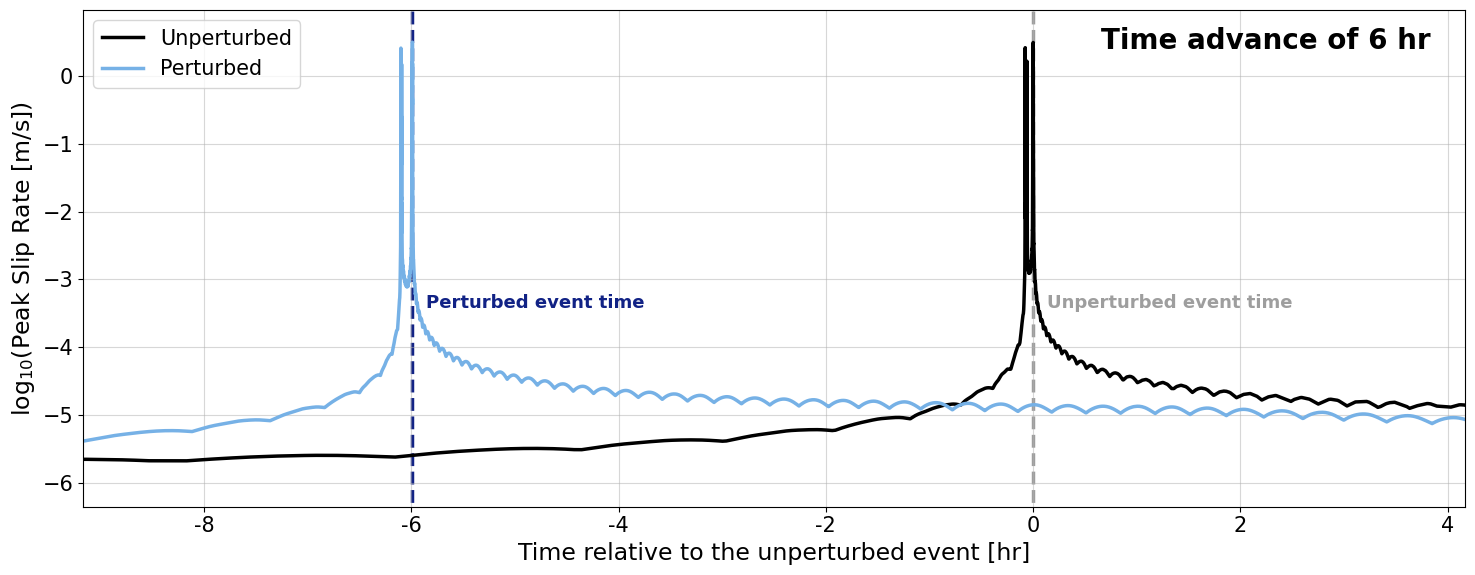

In [60]:
if 'done' not in locals(): 
    outputs1[:,:,0] = outputs1[:,:,0] - tstart[idx]
    outputs2[:,:,0] = outputs2[:,:,0] - tstart[idx]
    outputs3[:,:,0] = outputs3[:,:,0] - tstart[idx]
    if 'save_dir4' in locals(): outputs4[:,:,0] = outputs4[:,:,0] - tstart[idx]
    done = True

plt.figure(figsize=(15,6))
shift_figure = False
# shift_figure = True
tvar = 'sliprate'
# inc = 1e3
inc1 = 1e3
inc2 = 5e4
if 'save_dir3' not in locals(): 
    i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc,outputs1[0,:,0]<=outputs2[0,-1,0]+inc))[0]
else:
    # i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc,outputs1[0,:,0]<=outputs3[0,-1,0]+inc))[0]
    i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc1,outputs1[0,:,0]<=outputs3[0,-1,0]+inc2))[0]
fout_time_max(save_dir1,outputs1[:,i1,:],tvar,lab='Unperturbed',plot_in_sec=True,col='k',save_on=False)
# maxvar1 = get_var(outputs1[:,i1,:],None,None,tvar,plot_in_sec=True,abs_on=False)[1]
# maxvar3 = get_var(outputs3[:,1:,:],None,None,tvar,plot_in_sec=True,abs_on=False)[1]
# base_t = np.linspace(outputs3[0,int(outputs3.shape[1]*0.05),0]\
#                         ,tend[idx]+100\
#                         ,10000)-outputs3[0,1,0]
# lag = get_lag(base_t,maxvar1,outputs1[0,i1,0]-outputs3[0,1,0],maxvar3,outputs3[0,1:,0]-outputs3[0,1,0],print_on=True)
# time_tag = "advance" if lag > 0 else "delay"
if not shift_figure:
    print('Not shifted')
    fout_time_max(save_dir3,outputs3[:,1:,:],tvar,lab='Perturbed',plot_in_sec=True,col=mp.myblue,save_on=False)
    if 'save_dir4' in locals(): fout_time_max(save_dir4,outputs4[:,1:,:],tvar,plot_in_sec=True,col=mp.myblue,save_on=False)
else:
    fout_time_max(save_dir3,outputs3[:,1:,:],tvar,toff=lag,lab='Perturbed',plot_in_sec=True,col=mp.myblue,save_on=False)
    if 'save_dir4' in locals(): fout_time_max(save_dir4,outputs4[:,1:,:],tvar,toff=lag,plot_in_sec=True,col=mp.myblue,save_on=False)
# plt.xlim(np.min([outputs3[0,int(outputs3.shape[1]*0.05),0],-100])+350,tend[idx]-tstart[idx]+50)
# plt.xlim(np.min([outputs3[0,int(outputs3.shape[1]*0.05),0],-100])-10000,tend[idx]+10000)
# xl = plt.gca().get_xlim()
xl = [-33000,15000]
yl = plt.gca().get_ylim()
plt.vlines(x=0,ymin=yl[0],ymax=yl[1],lw=2.5,colors='0.62',linestyles='--',zorder=0)
plt.text((xl[1]-xl[0])*0.01,-yl[1]*3.5,'Unperturbed event time',fontsize=13,color='0.62',fontweight='bold')
plt.vlines(x=(tstart3[4]-tstart[idx]),ymin=yl[0],ymax=yl[1],lw=2.5,colors=mp.mynavy,linestyles='--',zorder=0)
plt.text((tstart3[4]-tstart[idx])+(xl[1]-xl[0])*0.01,-yl[1]*3.5,'Perturbed event time',fontsize=13,color=mp.mynavy,fontweight='bold')
if lag < 3600:
    plt.text(xl[1]-(xl[1]-xl[0])*0.025,yl[1]*0.75,'Time %s of %d s'%(time_tag,np.round(lag)),fontsize=20,color='k',fontweight='bold',ha='right',va='top')
    plt.xlabel('Time relative to the unperturbed event [s]',fontsize=17)
else:
    plt.text(xl[1]-(xl[1]-xl[0])*0.025,yl[1]*0.75,'Time %s of %d hr'%(time_tag,np.round(lag/3600)),fontsize=20,color='k',fontweight='bold',ha='right',va='top')
    xt = np.linspace(-3600*10,3600*4,8)
    xtl = ['%d'%(ixt/3600) for ixt in xt]
    plt.xticks(ticks=xt,labels=xtl)
    plt.xlabel('Time relative to the unperturbed event [hr]',fontsize=17)
plt.ylim(-yl[1]*6.5,yl[1])
plt.xlim(xl)
plt.legend(fontsize=15,loc='upper left')
plt.ylabel('log$_{10}$(Peak Slip Rate [m/s])',fontsize=17)
plt.grid(True,alpha=0.5)
plt.savefig('%s/pub_trigger_response.png'%(save_dir3),dpi=300)
plt.show()

In [62]:
(tstart[idx]-tstart3[4])/3600

5.98939320034451

# Compare fault (probe) outputs

## Peak value along the whole fault

Mode: Maximum along fault
Mode: Maximum along fault


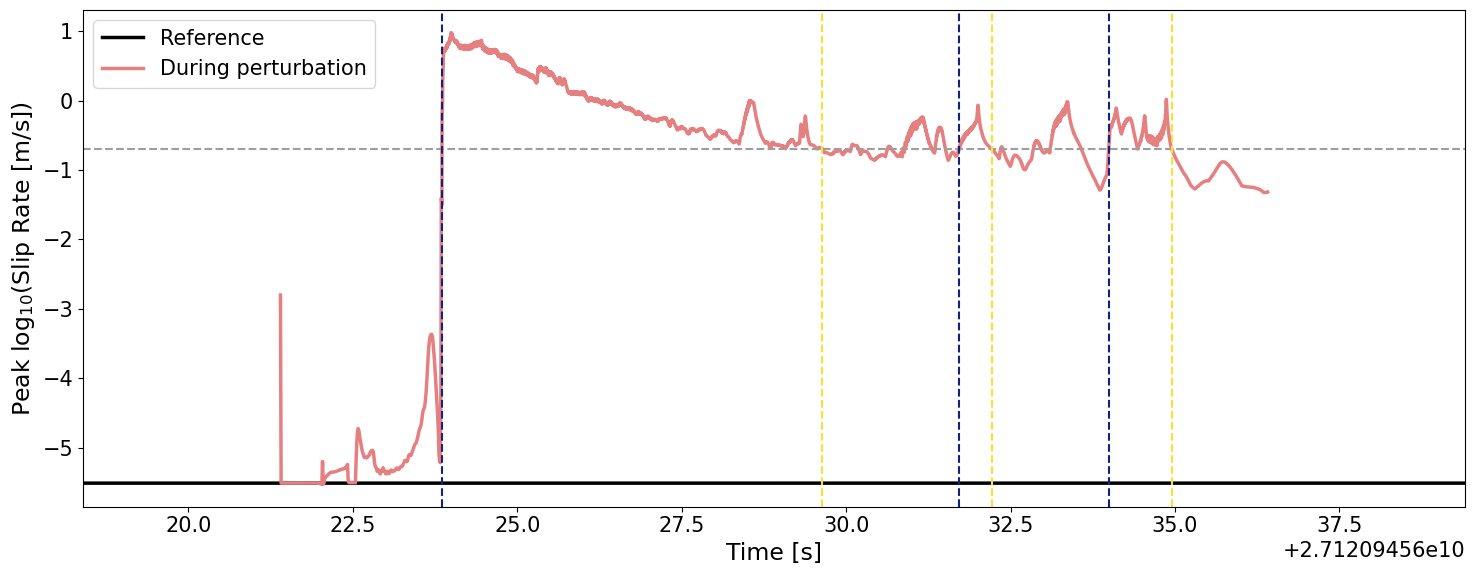

In [17]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(15,6))
tvar = 'sliprate'
inc = 1e3
if 'save_dir3' not in locals(): 
    i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc,outputs1[0,:,0]<=outputs2[0,-1,0]+inc))[0]
else:
    i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc,outputs1[0,:,0]<=outputs3[0,-1,0]+inc))[0]
fout_time_max(save_dir1,outputs1[:,i1,:],tvar,lab='Reference',plot_in_sec=True,save_on=False)
fout_time_max(save_dir2,outputs2,tvar,lab='During perturbation',plot_in_sec=True,col=mp.mypink,save_on=False)
add = (outputs2[0,-1,0]-outputs2[0,0,0])*0.2
yl = plt.gca().get_ylim()
plt.hlines(y=np.log10(2e-1),xmin=outputs2[0,0,0]-add,xmax=outputs2[0,-1,0]+add,color='0.62',linestyles='--')
plt.vlines(x=tstart2[0],ymin=yl[0],ymax=yl[1],color=mp.mynavy,linestyles='--')
plt.vlines(x=tend2[0],ymin=yl[0],ymax=yl[1],color=mp.myyellow,linestyles='--')
plt.vlines(x=tstart2[1],ymin=yl[0],ymax=yl[1],color=mp.mynavy,linestyles='--')
plt.vlines(x=tend2[1],ymin=yl[0],ymax=yl[1],color=mp.myyellow,linestyles='--')
plt.vlines(x=tstart2[2],ymin=yl[0],ymax=yl[1],color=mp.mynavy,linestyles='--')
plt.vlines(x=tend2[2],ymin=yl[0],ymax=yl[1],color=mp.myyellow,linestyles='--')
plt.xlim(outputs2[0,0,0]-add,outputs2[0,-1,0]+add)
plt.ylim(yl)
plt.legend(fontsize=15,loc='upper left')
plt.show()

In [ ]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(15,6))
tvar = 'sliprate'
inc1,inc2 = 1e3,1e6
i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc1,outputs1[0,:,0]<=outputs3[0,-1,0]+inc2))[0]
i4 = np.where(outputs4[0,:,0]<=outputs3[0,-1,0]+inc2)[0]
fout_time_max(save_dir1,outputs1[:,i1,:],tvar,lab='Previous',plot_in_sec=True,col='k',save_on=False)
fout_time_max(save_dir2,outputs2,tvar,lab='Reference 1',plot_in_sec=True,col=mp.mypink,save_on=False)
fout_time_max(save_dir3,outputs3,tvar,lab='Reference 2',plot_in_sec=True,col=mp.myblue,save_on=False)
fout_time_max(save_dir4,outputs4[:,i4,:],tvar,lab='Reference 3',plot_in_sec=True,col=mp.mygreen,save_on=False)
plt.legend(fontsize=15,loc='upper left')
plt.show()

In [ ]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(15,6))
tvar = 'sliprate'
inc1 = 100
inc2 = inc1
# i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc1,outputs1[0,:,0]<=outputs4[0,0,0]+inc2))[0]
# i3 = np.where(outputs3[0,:,0]>=outputs4[0,0,0]-inc1)[0]
# i4 = np.where(outputs4[0,:,0]<=outputs4[0,0,0]+inc2)[0]
# i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs3[0,0,0]-inc1,outputs1[0,:,0]<=outputs3[0,0,0]+inc2))[0]
# i3 = np.where(outputs3[0,:,0]<=outputs3[0,0,0]+inc2)[0]
i1 = np.where(outputs1[0,:,0]<=outputs2[0,-1,0]+inc2)[0]
# i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc1,outputs1[0,:,0]<=outputs2[0,-1,0]+inc2))[0]
# i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs3[0,0,0]-inc1,outputs1[0,:,0]<=outputs3[0,-1,0]+inc2))[0]
# print(len(i1))
# i2 = np.where(outputs2[0,:,0]>=outputs3[0,0,0]-inc1)[0]
# fout_time_max(save_dir1,outputs1,tvar,lab='Previous',plot_in_sec=True,col='k',abs_on=False,save_on=False)
fout_time_max(save_dir1,outputs1[:,i1,:],tvar,lab='Previous',plot_in_sec=True,col='k',abs_on=False,save_on=False)
fout_time_max(save_dir2,outputs2,tvar,lab='Reference 1',plot_in_sec=True,col=mp.mypink,abs_on=False,save_on=False,ls='--')
# fout_time_max(save_dir4,outputs4,tvar,lab='Reference 3',plot_in_sec=True,col=mp.mygreen,abs_on=False,save_on=False)
# fout_time_max(save_dir2,outputs2[:,i2,:],tvar,lab='Reference 1',plot_in_sec=True,col=mp.mypink,abs_on=False,save_on=False)
# fout_time_max(save_dir3,outputs3[:,i3,:],tvar,lab='Reference 2',plot_in_sec=True,col=mp.myblue,abs_on=False,save_on=False)
fout_time_max(save_dir3,outputs3,tvar,lab='ckp4650',plot_in_sec=True,col=mp.myblue,abs_on=False,save_on=False)
# fout_time_max(save_dir3,outputs3,tvar,lab='Reference 2',plot_in_sec=True,col=mp.myblue,abs_on=False,save_on=False)
# fout_time_max(save_dir4,outputs4[:,i4,:],tvar,lab='Reference 3',plot_in_sec=True,col=mp.mygreen,abs_on=False,save_on=False)
# plt.xlim(outputs2[0,0,0]-inc1,outputs2[0,-1,0]+inc2)
# plt.ylim(-0.5,0.2)
plt.xlim(1.1905e6,1.190625e6)
# plt.xlim(1.0278e6,1.032e6)
# plt.xlim(1.3588e6,1.36e6)
# plt.xlim(1.388585e6,1.3888e6)
plt.ylim(-5.5,1)
plt.legend(fontsize=15,loc='lower left')
plt.show()

## Value at certain depth, within specific time range

Depth = 4.3 [km]


Depth = 4.3 [km]


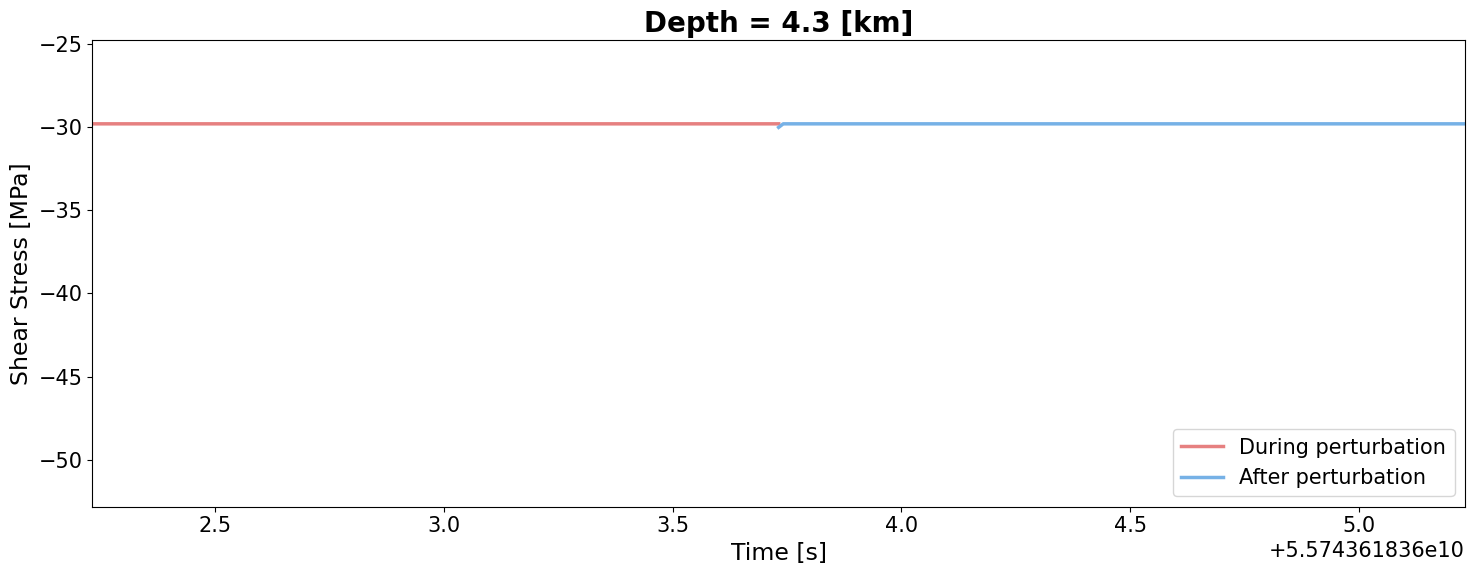

In [5]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(15,6))
tdep,tvar = evdep[idx],'shearT'
inc = 1e4
# i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc,outputs1[0,:,0]<=outputs2[0,-1,0]+inc))[0]
# fout_time(save_dir1,outputs1[:,i1,:],dep1,tdep,tvar,plot_in_sec=True,lab='Unperturbed',save_on=False)
# fout_time(save_dir2,outputs2[:,1:,:],dep2,tdep,tvar,col=mp.mypink,plot_in_sec=True,lab='Perturbed',save_on=False)
# outputs22 = outputs2.copy()
# outputs22[:,:,3] = outputs22[:,:,3] - 0.5
# fout_time(save_dir2,outputs22,dep2,tdep,tvar,col=mp.mypink,plot_in_sec=True,lab='During perturbation',save_on=False)
fout_time(save_dir2,outputs2,dep2,tdep,tvar,col=mp.mypink,plot_in_sec=True,lab='During perturbation',save_on=False)
fout_time(save_dir3,outputs3,dep3,tdep,tvar,col=mp.myblue,plot_in_sec=True,lab='After perturbation',save_on=False)
plt.legend(fontsize=15,loc='lower right')
# plt.legend(fontsize=15,loc='upper right')
# plt.xlim(outputs2[0,0,0]-1.5,outputs3[0,0,0]+50)
plt.xlim(outputs2[0,-1,0]-1.5,outputs3[0,0,0]+1.5)
# plt.xlim(outputs2[0,0,0]-1.5,outputs2[0,-1,0]+50)
# plt.xlim(outputs2[0,0,0]-1.5,outputs2[0,-1,0]+5)
# plt.xlim(outputs3[0,0,0]-1.5,outputs3[0,-1,0]+0.5)
plt.show()


Depth = 4.3 [km]
Depth = 4.3 [km]


Depth = 4.3 [km]


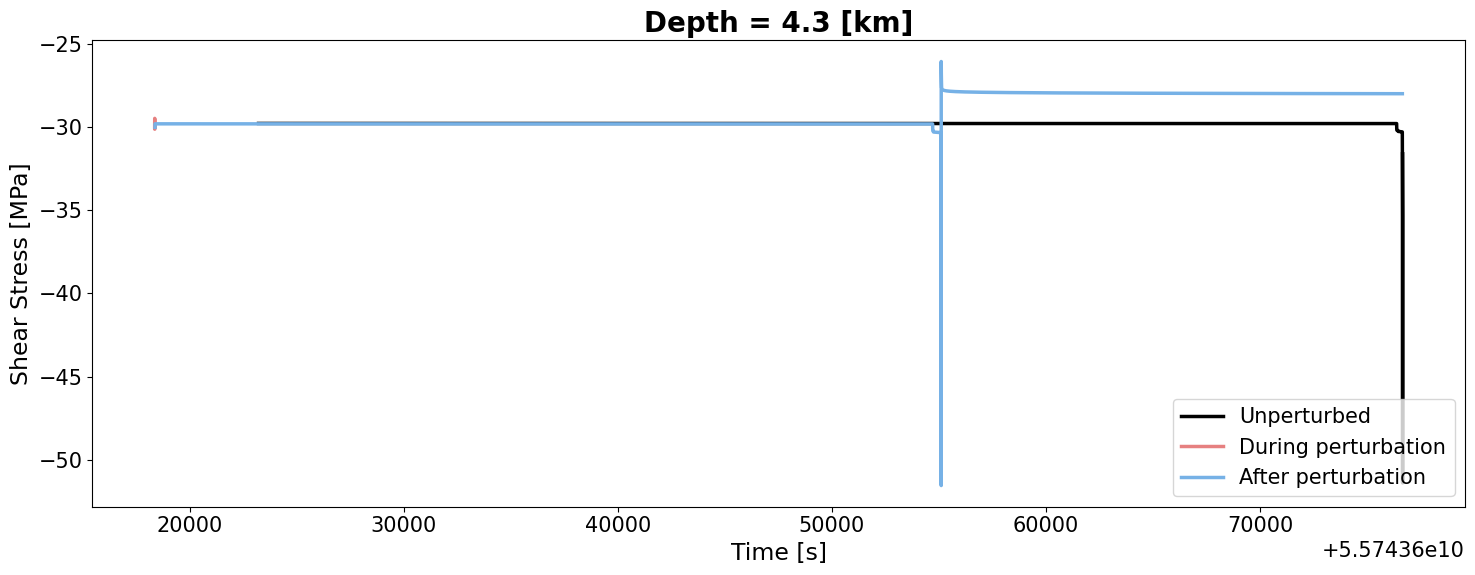

In [9]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(15,6))
tdep,tvar = evdep[idx],'shearT'
inc = 1e4
i1 = np.where(np.logical_and(outputs1[0,:,0]>=tstart[idx]-58320,outputs1[0,:,0]<=tstart[idx]))[0]
i3 = np.where(np.logical_and(outputs3[0,:,0]>=tstart[idx]-58320,outputs3[0,:,0]<=tstart[idx]))[0]
fout_time(save_dir1,outputs1[:,i1,:],dep1,tdep,tvar,plot_in_sec=True,lab='Unperturbed',save_on=False)
fout_time(save_dir2,outputs2,dep2,tdep,tvar,col=mp.mypink,plot_in_sec=True,lab='During perturbation',save_on=False)
fout_time(save_dir3,outputs3[:,i3,:],dep3,tdep,tvar,col=mp.myblue,plot_in_sec=True,lab='After perturbation',save_on=False)
plt.legend(fontsize=15,loc='lower right')
# plt.legend(fontsize=15,loc='upper right')
# plt.xlim(outputs2[0,0,0]-1.5,outputs3[0,0,0]+50)
plt.show()


In [12]:
np.argmin(abs(dep1+tdep))

217

In [13]:
outputs1[np.argmin(abs(dep1+tdep)),i1,3]

array([-29.78983419, -29.78992351, -29.78998961, ..., -49.72400033,
       -46.05641321, -31.61434177])

In [32]:
indx = np.argmin(abs(abs(dep2)-abs(4.38)))

In [38]:
print(outputs2[indx,-1,5],outputs3[indx,0,5])
print(outputs2[indx,-1,3],outputs3[indx,1,3])

50.40358366627601 50.40549030764945
-30.21573541867141 -30.21403533700164


In [ ]:
print(outputs2[indx,-1,5],outputs1[indx,0,5])
print(outputs2[indx,-1,3],outputs1[indx,0,3])

Depth = 7.7 [km]


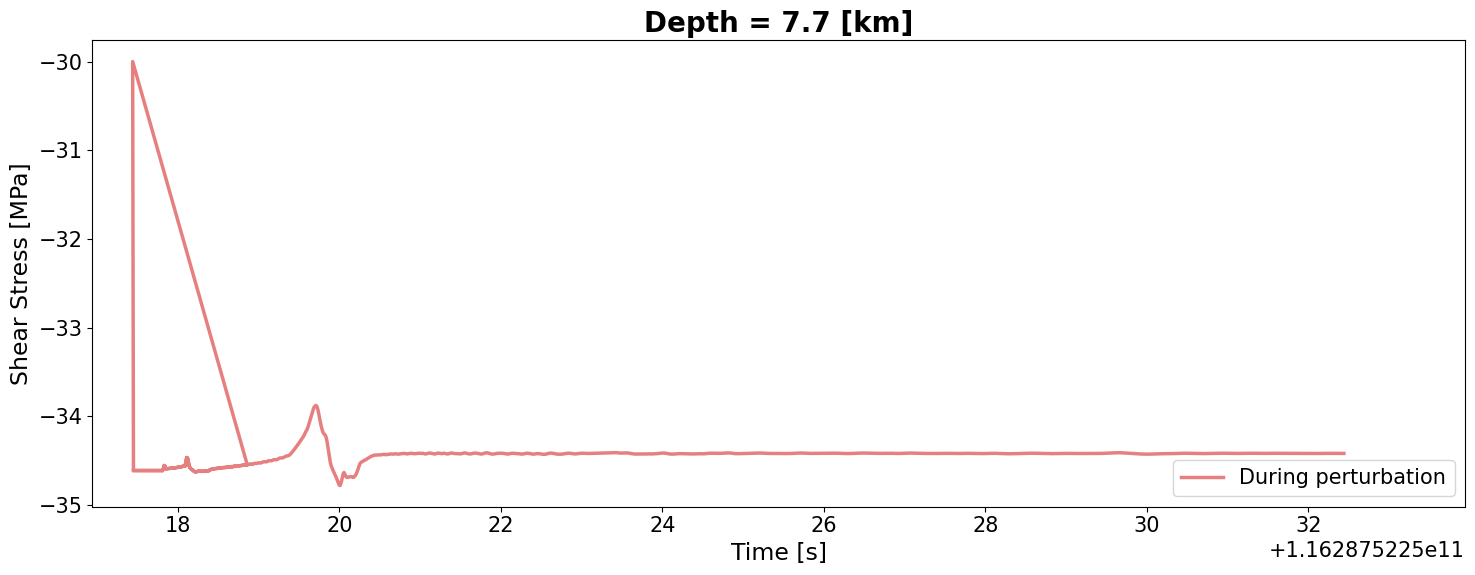

In [25]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(15,6))
tdep,tvar = 7.72,'shearT'
inc = 1e4
fout_time(save_dir2,outputs2[:,1:,:],dep2,tdep,tvar,col=mp.mypink,plot_in_sec=True,lab='During perturbation',save_on=False)
plt.legend(fontsize=15,loc='lower right')
plt.xlim(outputs2[0,0,0]-.5,outputs2[0,0,0]+1.5)
plt.show()


# Check the last written output

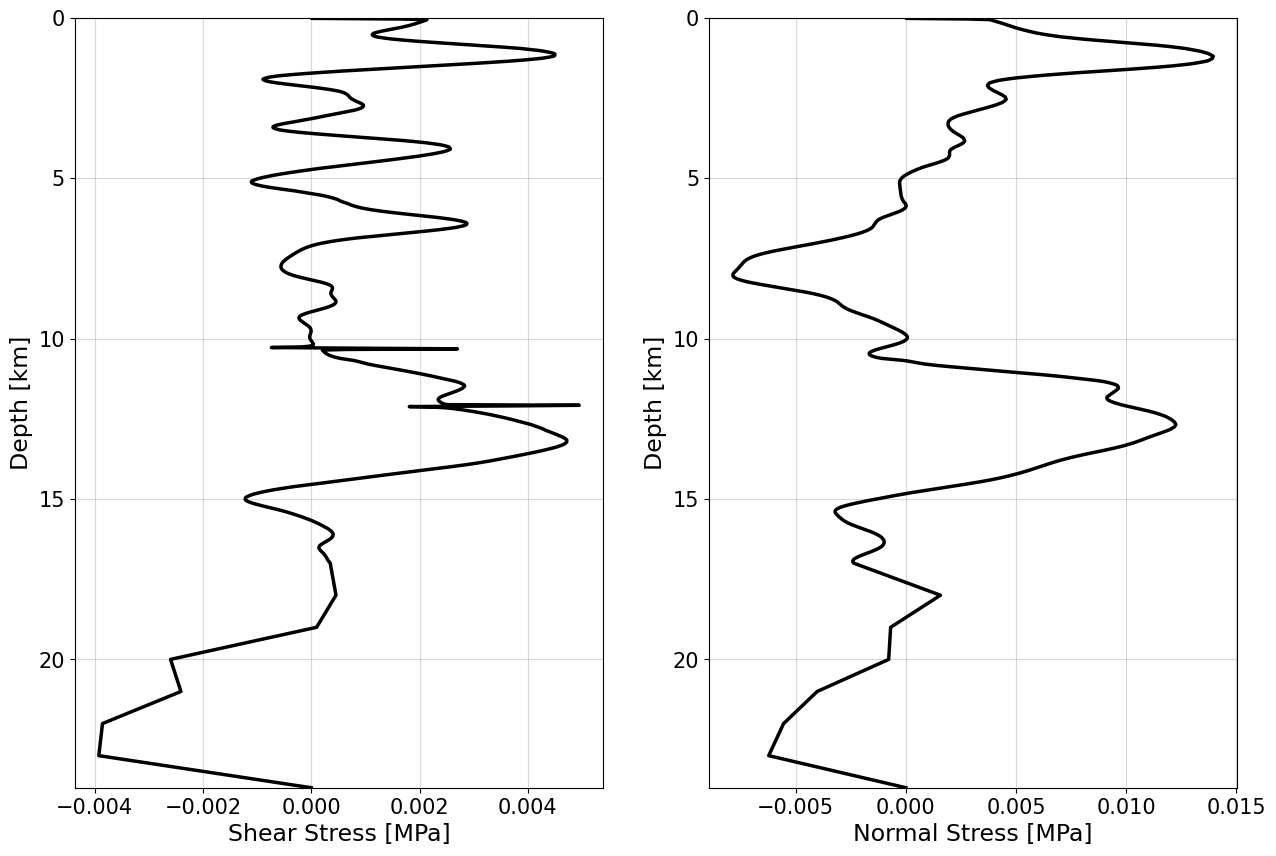

In [55]:
fig,ax=plt.subplots(ncols=2,figsize=(15,10))
ivar = 3
# ax[0].plot(outputs2[:,-1,ivar],-dep2,c='k',lw=2.5,label='Last output during perturbation')
# ax[0].plot(outputs3[:,1,ivar],-dep3,c=mp.myburgundy,lw=2.5,linestyle='--',label='First output after perturbation')
# ax[0].legend(fontsize=14)
ax[0].plot(outputs3[:,1,ivar]-outputs2[:,-1,ivar],-dep2,c='k',lw=2.5,label='Last output during perturbation')
ax[0].set_xlabel('Shear Stress [MPa]',fontsize=17)
ax[0].set_ylabel('Depth [km]',fontsize=17)
ax[0].grid(True,alpha=0.5)
ax[0].set_ylim(0,24)
ax[0].invert_yaxis()

ivar = 5
# ax[1].plot(outputs2[:,-1,ivar],-dep2,c='k',lw=2.5,label='Last output during perturbation')
# ax[1].plot(outputs3[:,1,ivar],-dep3,c=mp.myburgundy,lw=2.5,linestyle='--',label='First output after perturbation')
# ax[1].legend(fontsize=14)
ax[1].plot(outputs3[:,1,ivar]-outputs2[:,-1,ivar],-dep2,c='k',lw=2.5,label='Last output during perturbation')
ax[1].set_xlabel('Normal Stress [MPa]',fontsize=17)
ax[1].set_ylabel('Depth [km]',fontsize=17)
ax[1].grid(True,alpha=0.5)
ax[1].set_ylim(0,24)
ax[1].invert_yaxis()
plt.show()

In [ ]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(6,8))
target_var = 'state'
along_fault_at_transition(save_dir1,outputs1[:, outputs1.shape[1]-1,:],dep1,target_var,col='0.5',lab='output1; End',save_on=False)
along_fault_at_transition(save_dir2,outputs2[:,0,:],dep2,target_var,col=mp.mypink,lab='output2; Start',save_on=False)
along_fault_at_transition(save_dir2,outputs2[:, outputs2.shape[1]-1,:],dep2,target_var,col='0.62',lab='output2; End',save_on=False)
along_fault_at_transition(save_dir3,outputs3[:,0,:],dep3,target_var,col=mp.myblue,lab='output3; Start',save_on=False)
plt.legend(fontsize=15,loc='lower left')
plt.gca().invert_yaxis()

In [ ]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(6,8))
target_var = 'state'
indx1,indx2 = outputs1.shape[1]-1, 0
along_fault_at_transition(save_dir2,outputs2[:,0,:]-outputs1[:,outputs1.shape[1]-1,:],dep2,target_var,lab='output2 - output1',col=mp.myburgundy,save_on=False)
along_fault_at_transition(save_dir3,outputs3[:,0,:]-outputs2[:,outputs2.shape[1]-1,:],dep3,target_var,lab='output3 - output2',col=mp.mynavy,save_on=False)
plt.legend(fontsize=15,loc='lower left')
plt.gca().invert_yaxis()

In [ ]:
print('Outputs1: from %1.18e to %1.18e s'%(outputs1[0,0,0],outputs1[0,-1,0]))
print('Time at checkpoint 1: %1.18e s'%(ckp_dat1[-1][-1]))
print('Outputs2: from %1.18e to %1.18e s'%(outputs2[0,0,0],outputs2[0,-1,0]))
print('Time at checkpoint 2: %1.18e s'%(ckp_dat2[-1][-1]))
print('Outputs3: from %1.18e to %1.18e s'%(outputs3[0,0,0],outputs3[0,-1,0]))

# Plot τ/σ

In [ ]:
target_depth = evdep[idx]
indx = np.argmin(abs(abs(dep2) - abs(target_depth)))
print('Depth: %1.2f km'%(-dep2[indx]))
pure_Ts = np.array(outputs2[indx])[:,3]
pure_Pn = np.array(outputs2[indx])[:,5]
rel_time = np.array(outputs2[indx])[:,0] - np.array(outputs2[indx])[0,0]

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(rel_time,-pure_Ts/pure_Pn,'k',lw=2.5)
plt.xlabel('Time [s]',fontsize=17)
plt.ylabel(r'$\tau/\sigma$',fontsize=17)
plt.grid(True,alpha=0.5)
plt.ylim(0.3,0.8)
plt.show()

# Compare with the input stress perturbation

In [5]:
delPn = np.loadtxt('%s/ssaf_%s_Pn_pert_mu%02d_%d.dat'%(save_dir,model_n,int(mu*10),receivef_strike))
delTs = np.loadtxt('%s/ssaf_%s_Ts_pert_mu%02d_%d.dat'%(save_dir,model_n,int(mu*10),receivef_strike))
depth_range = np.loadtxt('%s/ssaf_%s_dep_stress_pert_mu%02d_%d.dat'%(save_dir,model_n,int(mu*10),receivef_strike))

## Compare with input normal stress/shear stress 

### Stress change

Depth = 4.00 [km]


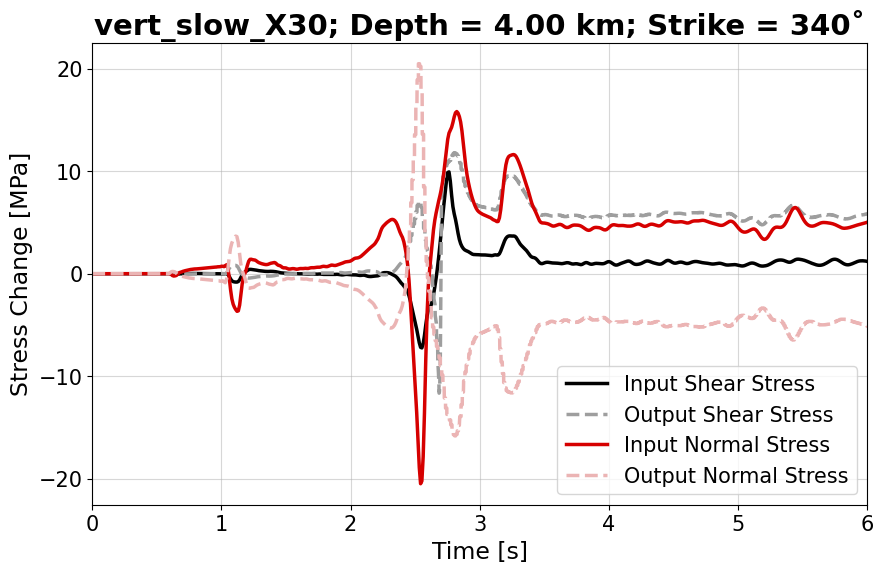

In [6]:
from scipy import interpolate
# target_depth = evdep[idx]
target_depth = 4
outputs = outputs2[:,1:,:]
indx = np.argmin(abs(abs(dep2) - abs(target_depth)))
print('Depth = %1.2f [km]'%abs(dep2[indx]))
pn = np.array(outputs[indx])[:,5]-np.array(outputs[indx])[0,5]
ts = np.array(outputs[indx])[:,3]-np.array(outputs[indx])[0,3]
time_out = np.array(outputs[indx])[:,0]-np.array(outputs[indx])[0,0]
delPn_at_D = [interpolate.interp1d(depth_range,delPn[ti])(-target_depth) for ti in range(delPn.shape[0])]
delTs_at_D = [interpolate.interp1d(depth_range,delTs[ti])(-target_depth) for ti in range(delTs.shape[0])]
t = np.linspace(0,delTs.shape[0]*0.01,delTs.shape[0])

plt.rcParams['font.size'] = '15'
plt.figure(figsize=(10,6))
plt.plot(t,delTs_at_D,'k',lw=2.5,label='Input Shear Stress')
# plt.plot(time_out,-ts,'0.62',lw=2.5,linestyle='--',label='Output Shear Stress')
plt.plot(time_out,ts,'0.62',lw=2.5,linestyle='--',label='Output Shear Stress')
plt.plot(t,delPn_at_D,c=mp.myburgundy,lw=2.5,label='Input Normal Stress')
plt.plot(time_out,pn,c=mp.mypalepink,lw=2.5,linestyle='--',label='Output Normal Stress')
plt.legend(fontsize=15,loc='lower right')
plt.title('%s; Depth = %1.2f km; Strike = %d˚'%(model_n,target_depth,receivef_strike),fontsize=21,fontweight='bold')
plt.xlabel('Time [s]',fontsize=17)
plt.ylabel('Stress Change [MPa]',fontsize=17)
plt.grid(True,alpha=0.5)
plt.xlim(0,6)
plt.show()

### Absolute stress level

Depth = 4.4 [km]
Depth = 4.4 [km]
Depth = 4.4 [km]


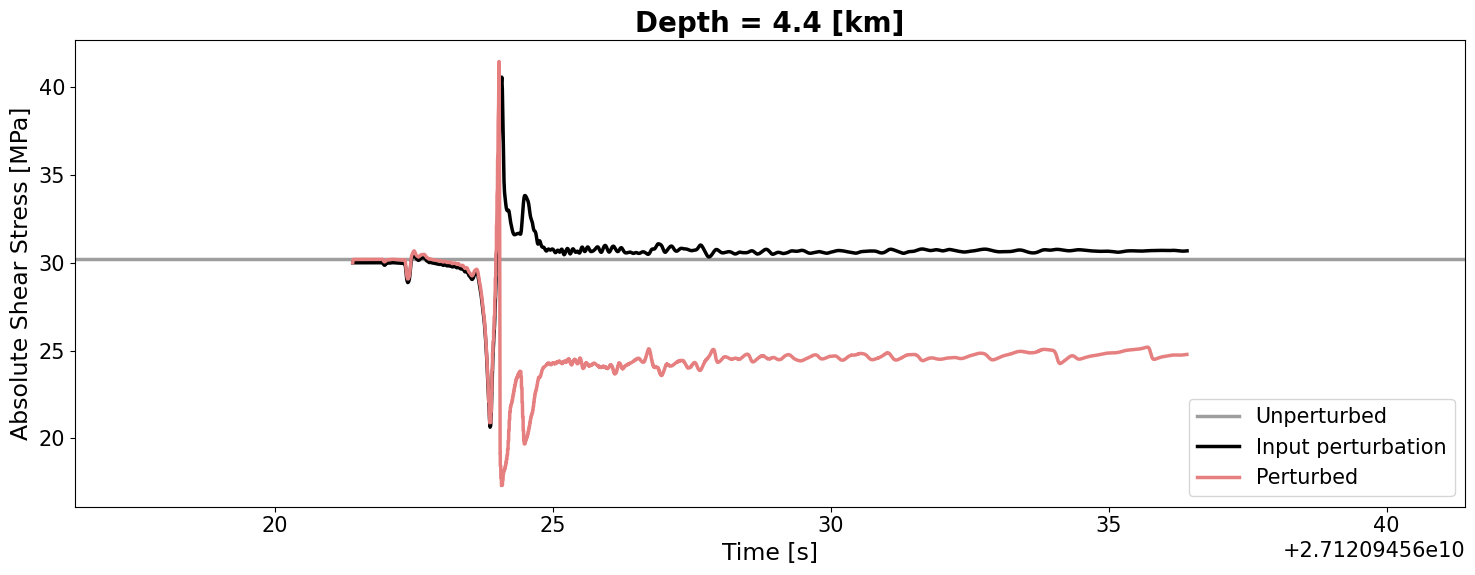

In [10]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(15,6))
# tdep,tvar = evdep[idx],'normalT'
tdep,tvar = evdep[idx],'shearT'
if tvar == 'normalT':
    delVar = delPn
elif tvar == 'shearT':
    delVar = delTs
# abs_on = False
abs_on = True
inc = 1e4
i1 = np.where(np.logical_and(outputs1[0,:,0]>=outputs2[0,0,0]-inc,outputs1[0,:,0]<=outputs2[0,-1,0]+inc))[0]
fout_time(save_dir1,outputs1[:,i1,:],dep1,tdep,tvar,plot_in_sec=True,col='0.62',lab='Unperturbed',abs_on=abs_on,save_on=False)
otime,_ = stress_pert_at_depth(save_dir2,outputs2,dep2,delVar,depth_range,tdep,tvar,plot_in_sec=True,col='k',lab='Input perturbation',abs_on=abs_on,print_on=True,save_on=False)
fout_time(save_dir2,outputs2,dep2,tdep,tvar,col=mp.mypink,plot_in_sec=True,lab='Perturbed',abs_on=abs_on,save_on=False)
plt.legend(fontsize=15,loc='lower right')
plt.xlim(otime[0]-5,otime[-1]+5)
# plt.xlim(outputs2[0,0,0]-2.5,outputs2[0,-1,0]+2.5)
# plt.ylim(-36.9,-35)
# plt.ylim(35.25,36.5)
plt.show()


## Compute dCFS from the output to validate the behvaior

### During perturbation vs. input

4.38
Depth = 4.38 [km]


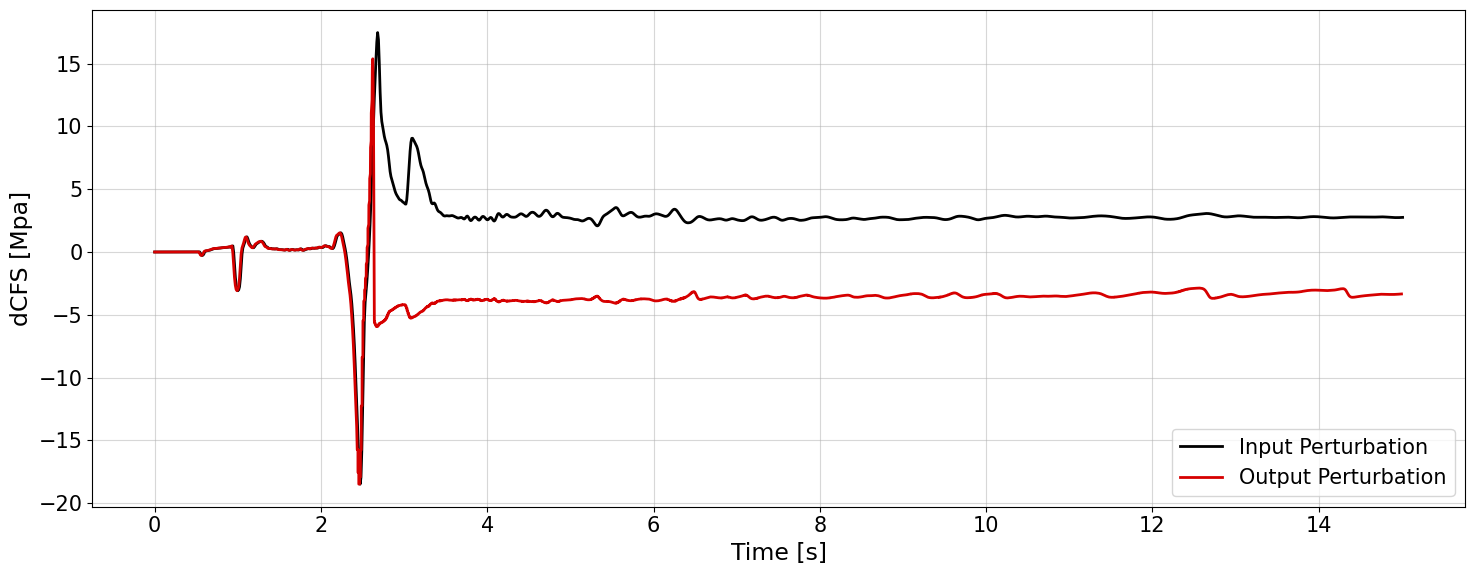

In [11]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(15,6))
tdep = evdep[idx]
print(tdep)
inc = 1e4
dCFSt_seissol = delTs + mu*delPn
# dCFS_at_depth(save_dir,outputs3[:,1:,:],dep2,dCFSt_seissol,depth_range,tdep,mu,dt=0.01,save_on=False)
# dCFS_at_depth(save_dir,outputs2,dep2,dCFSt_seissol,depth_range,tdep,mu,dt=0.01,save_on=False)
dCFS_at_depth(save_dir,outputs2[:,1:,:],dep2,dCFSt_seissol,depth_range,tdep,mu,dt=0.01,save_on=False)
plt.legend(fontsize=15,loc='lower right')
# plt.xlim(-1,0.5)
plt.show()


### After perturbation vs. During perturbation

Depth = 7.72 [km]


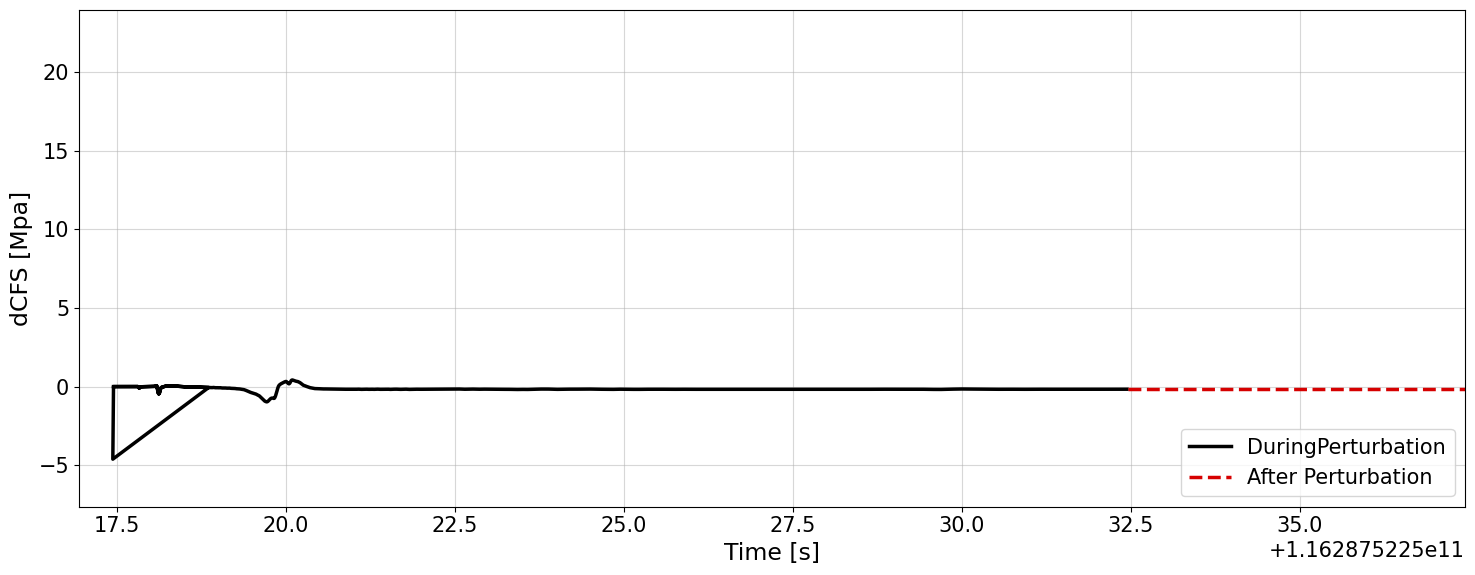

In [12]:
from scipy import interpolate
tdep = evdep[idx]
mu = 0.4
inc = 1e4

indx = np.argmin(abs(abs(dep2) - abs(tdep)))
print('Depth = %1.2f [km]'%abs(dep2[indx]))
pn2 = np.array(outputs2[indx])[1:,5]-np.array(outputs2[indx])[1,5]
ts2 = np.array(outputs2[indx])[1:,3]-np.array(outputs2[indx])[1,3]
dCFSt2 = -ts2 - mu*pn2
t2 = np.array(outputs2[indx])[1:,0] # -np.array(outputs2[indx])[0,0]

pn3 = np.array(outputs3[indx])[1:,5]-np.array(outputs2[indx])[1,5]
ts3 = np.array(outputs3[indx])[1:,3]-np.array(outputs2[indx])[1,3]
dCFSt3 = -ts3 - mu*pn3
t3 = np.array(outputs3[indx])[1:,0] # -np.array(outputs3[indx])[0,0]

plt.rcParams['font.size'] = '15'
plt.figure(figsize=(15,6))

plt.plot(t2,dCFSt2,color='k',lw=2.5,label='DuringPerturbation',linestyle='-')
plt.plot(t3,dCFSt3,color=mp.myburgundy,lw=2.5,label='After Perturbation',linestyle='--')
plt.xlabel('Time [s]',fontsize=17)
plt.ylabel('dCFS [Mpa]',fontsize=17)
plt.grid(True,alpha=0.5)
plt.tight_layout()

plt.legend(fontsize=15,loc='lower right')
plt.xlim(outputs2[0,0,0]-.5,outputs3[0,0,0]+5)
plt.ylim(-1.5,1.5)
plt.show()


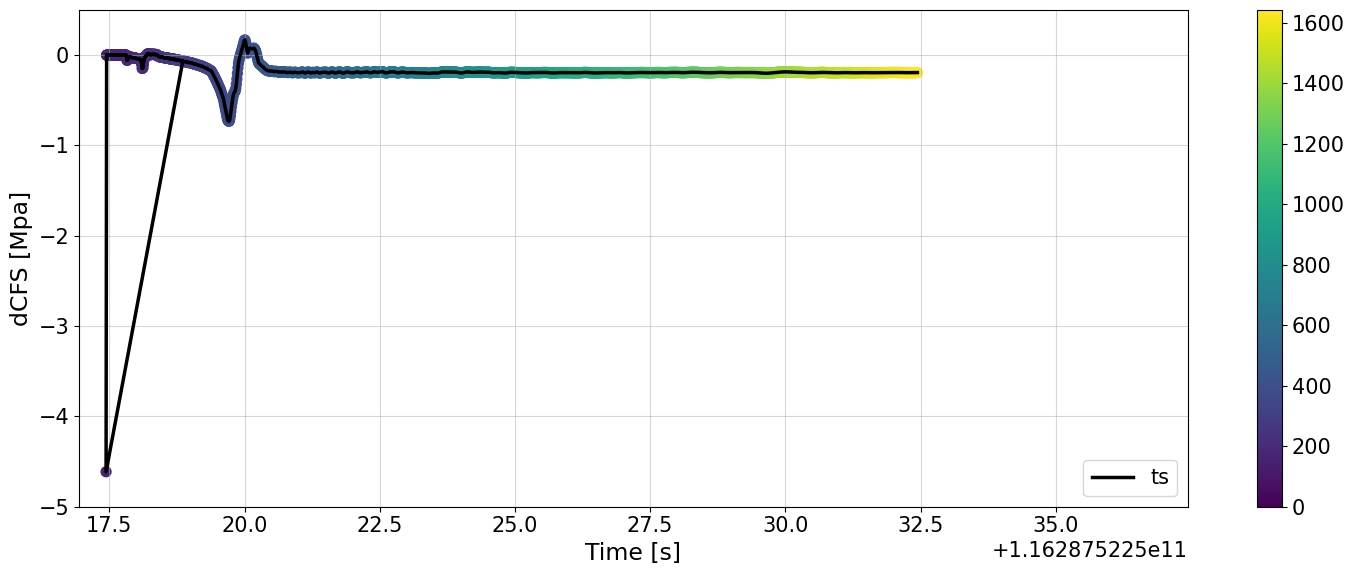

In [18]:

plt.rcParams['font.size'] = '15'
plt.figure(figsize=(15,6))

plt.plot(t2,-ts2,color='k',lw=2.5,label='ts',linestyle='-')
cb = plt.scatter(t2,-ts2,s=50,c=np.arange(len(ts2)))
# plt.plot(t2,pn2,color=mp.myburgundy,lw=2.5,label='After Perturbation',linestyle='--')
plt.colorbar(cb)
plt.xlabel('Time [s]',fontsize=17)
plt.ylabel('dCFS [Mpa]',fontsize=17)
plt.grid(True,alpha=0.5)
plt.tight_layout()

plt.legend(fontsize=15,loc='lower right')
plt.xlim(outputs2[0,0,0]-.5,outputs3[0,0,0]+5)
plt.ylim(-5,.5)
plt.show()